### Problem statement

In [1]:
# Loading dataset
import pandas as pd

bank_df = pd.read_csv(r"D:\Education\Data science\Assignments\6 Logistic Regression\bank-full.csv",
                     delimiter=';')
# Glancing the dataset
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
# Technical summary of dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
# Target variable y column is renamed to subscription
bank_df.rename(columns={'y':'Subscription'}, inplace=True)

In [4]:
# Duplicate entries present in the dataset
bank_df.duplicated().sum()

0

In [5]:
# Null values in the dataset
bank_df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
Subscription    0
dtype: int64

In [6]:
# Unique values details
bank_df.nunique()

age               77
job               12
marital            3
education          4
default            2
balance         7168
housing            2
loan               2
contact            3
day               31
month             12
duration        1573
campaign          48
pdays            559
previous          41
poutcome           4
Subscription       2
dtype: int64

In [7]:
# Target variable counts
bank_df['Subscription'].value_counts()

no     39922
yes     5289
Name: Subscription, dtype: int64

In [8]:
# Statistical information of numerical valued columns
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# Statistical summary of categorical valued columns
bank_df.describe(exclude=int)

,job,marital,education,default,housing,loan,contact,month,poutcome,Subscription
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [10]:
# Filtering categorical columns for data visualization
cols = bank_df.columns 
cols = cols.drop(['age', 'balance', 'duration', 'campaign', 'pdays', 'Subscription', 'previous', 'day'])
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

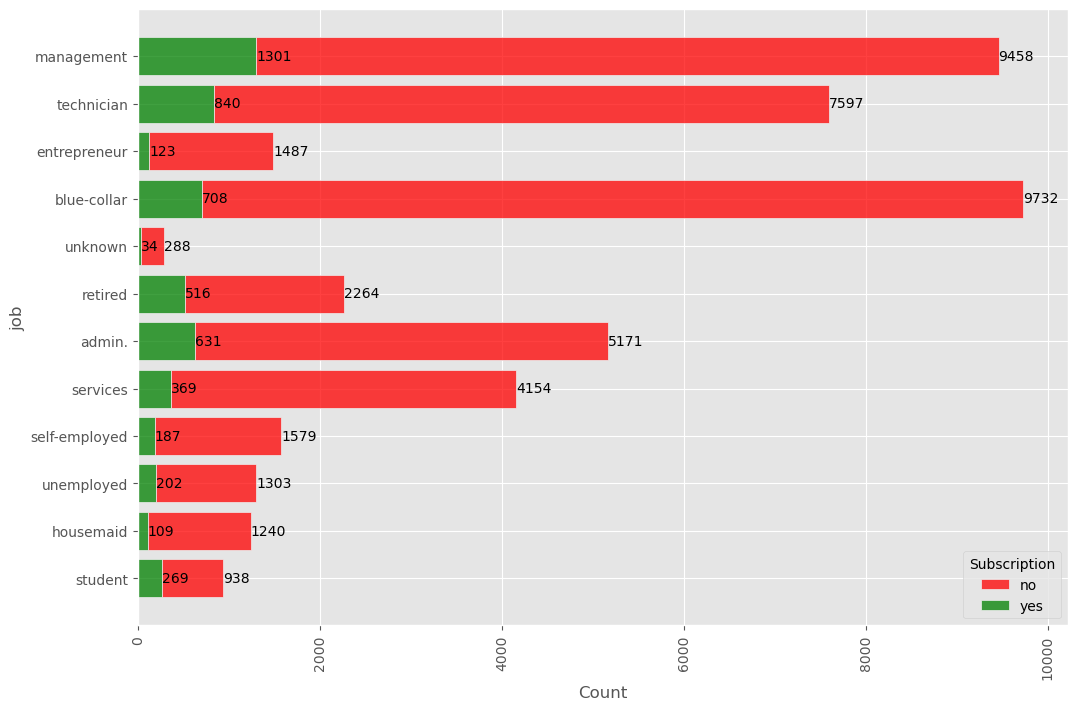

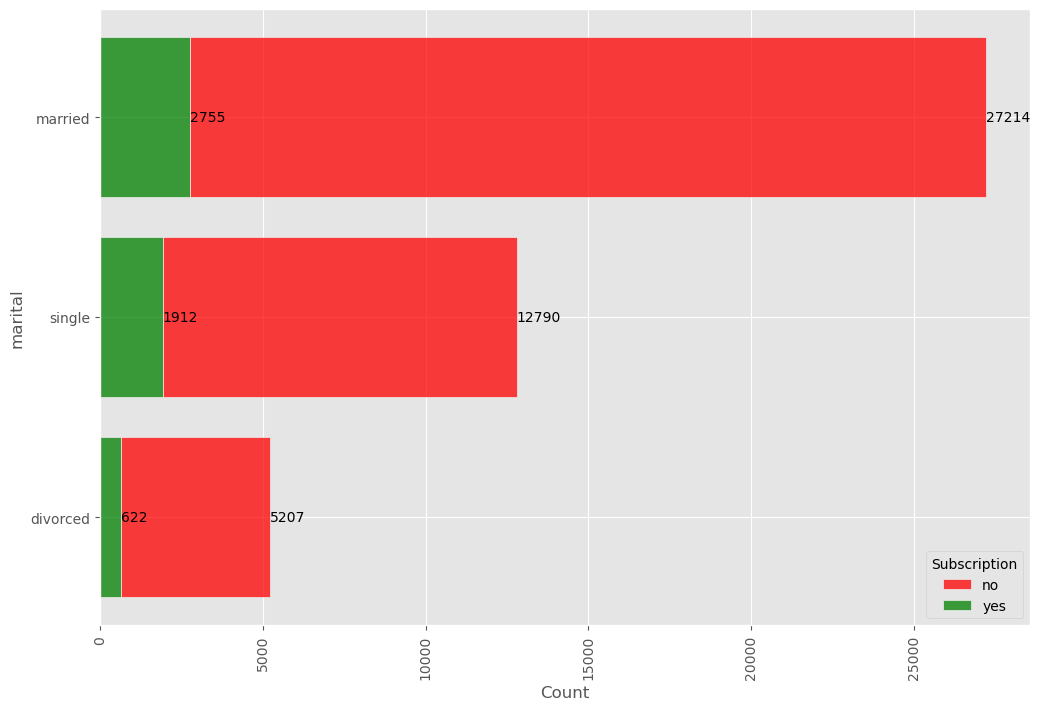

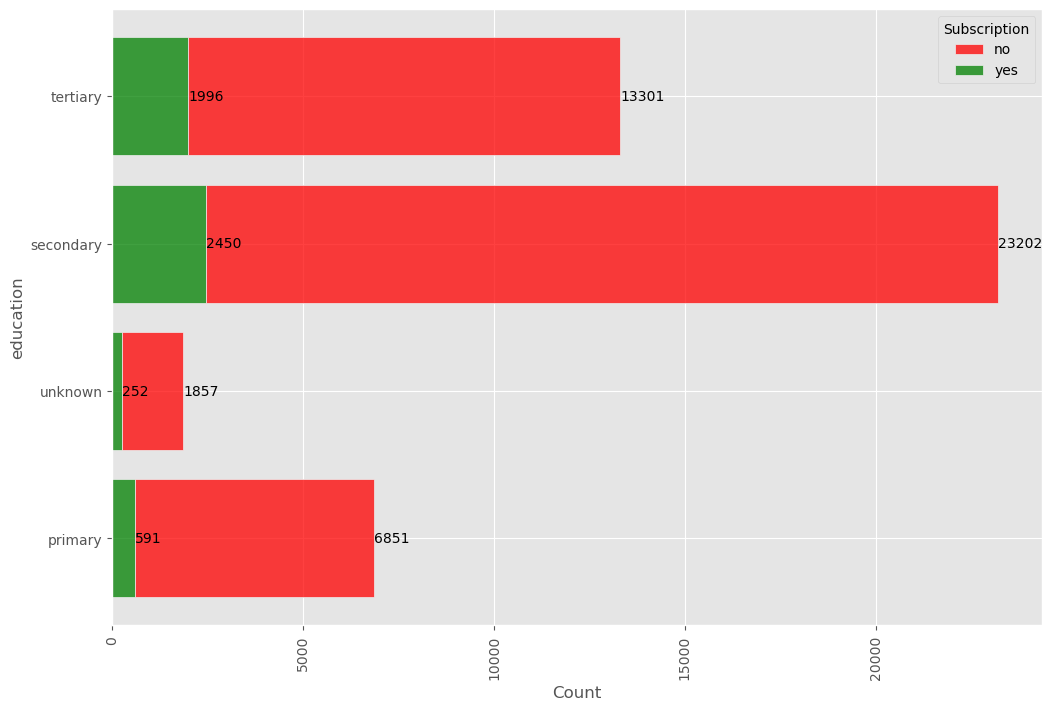

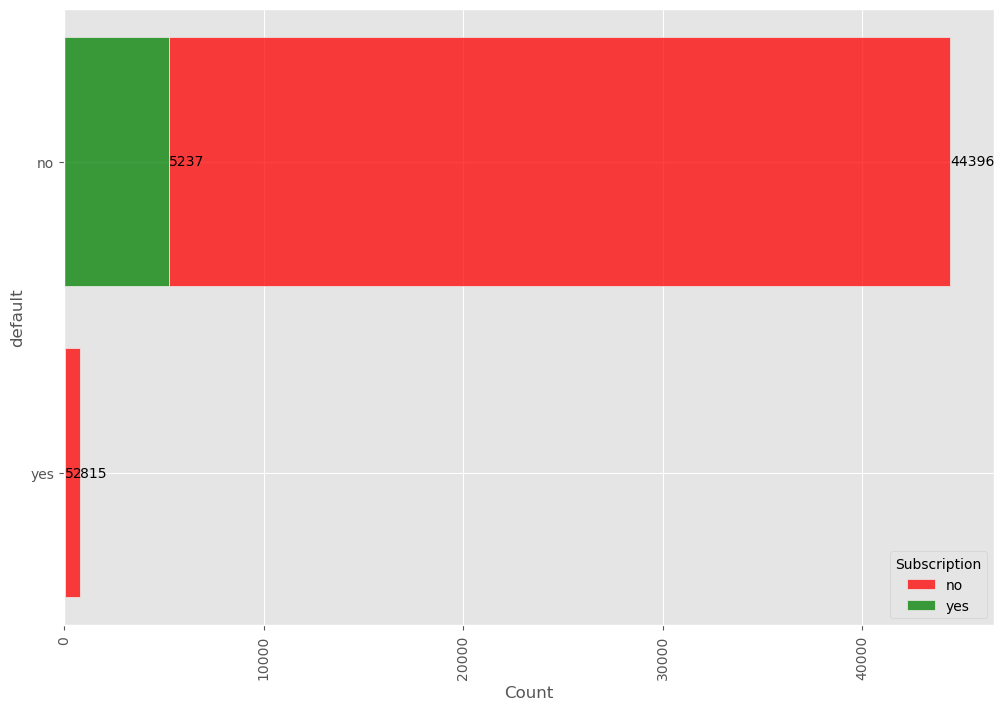

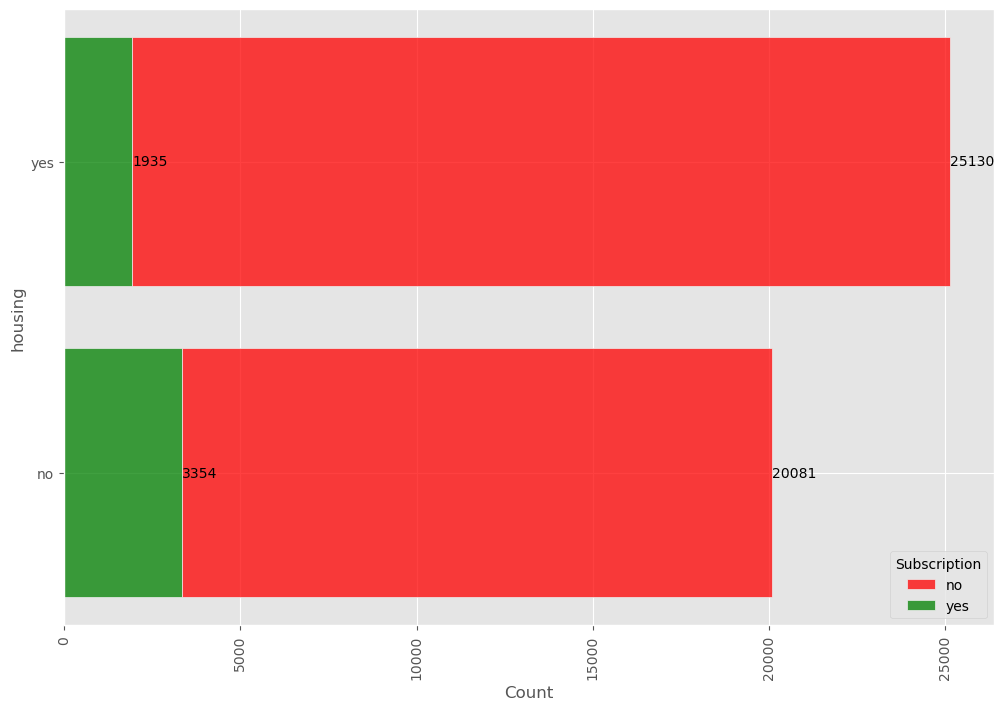

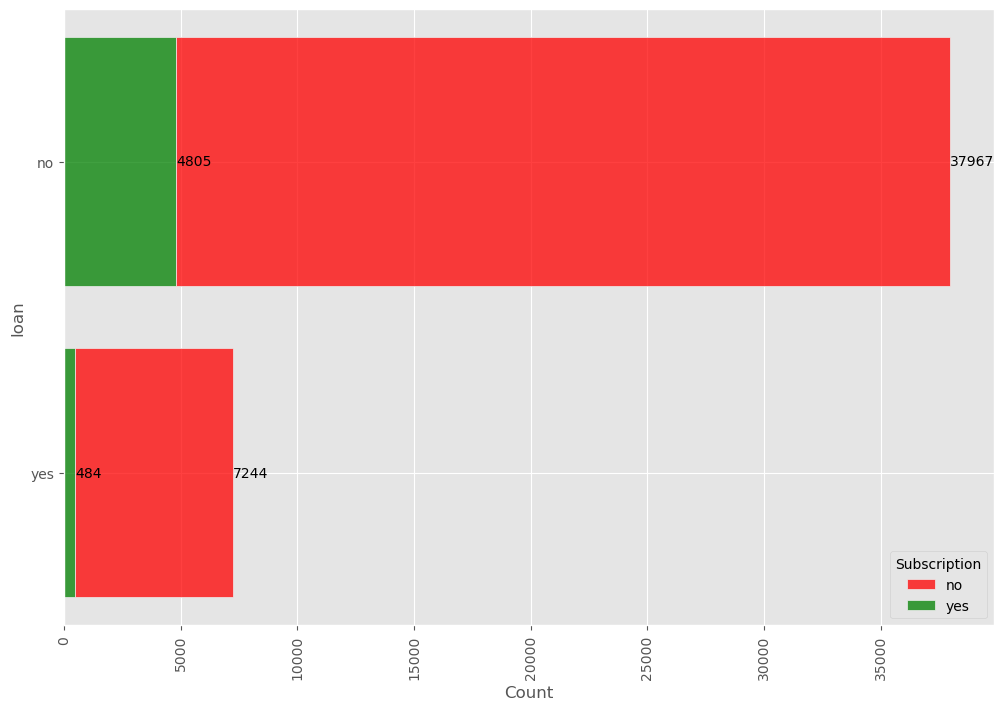

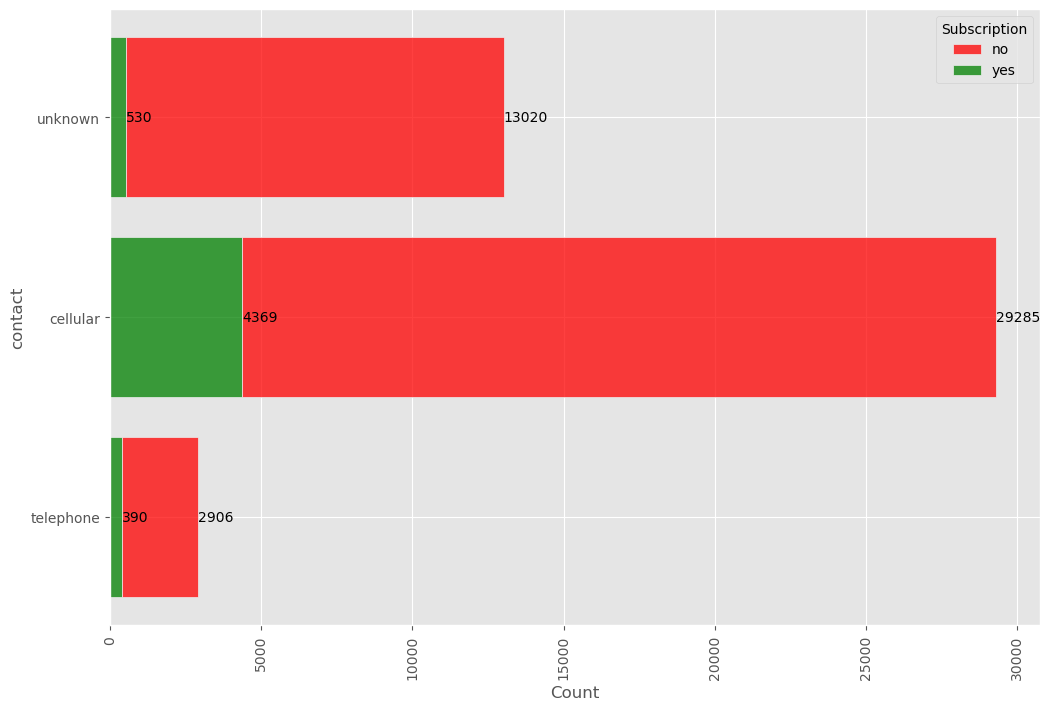

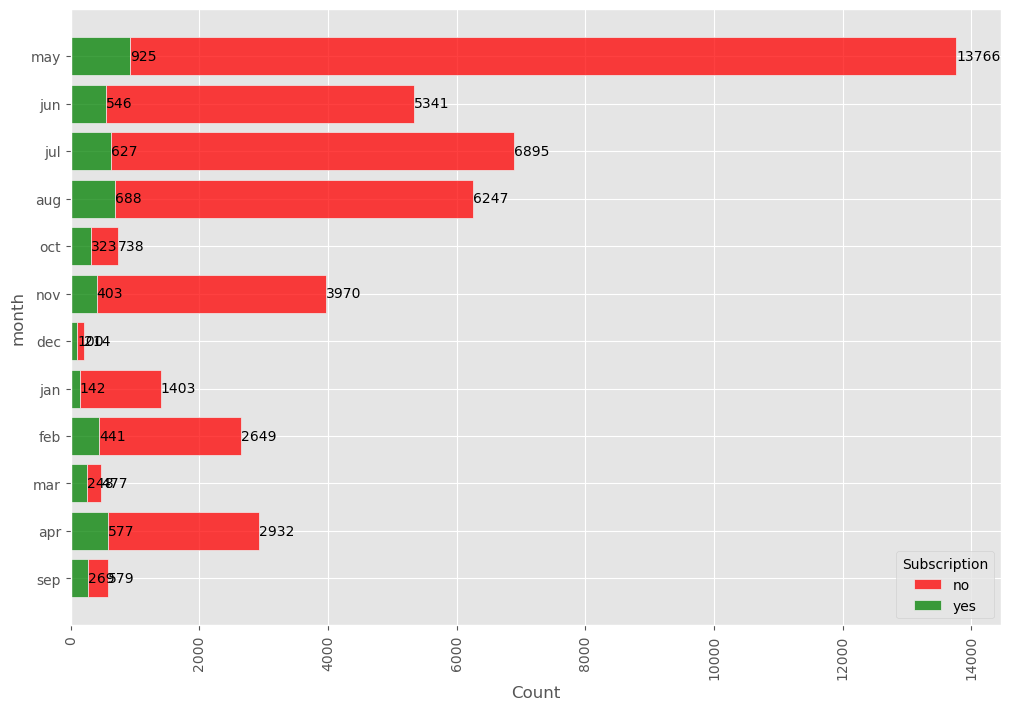

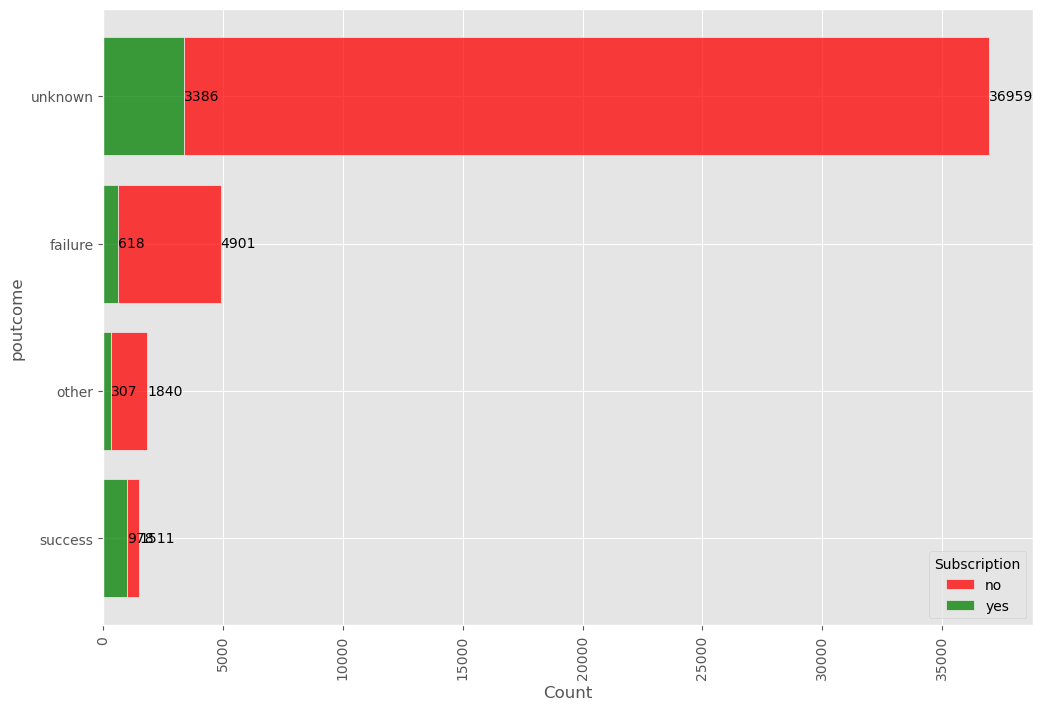

In [11]:
# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

for col in cols:
    plt.figure(figsize=(12, 8))
    ax = sns.histplot(data=bank_df, y=f'{col}', hue='Subscription', palette=('red', 'green'), 
                 discrete=True, multiple='stack', shrink=0.8)
    plt.xticks(rotation=90)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()

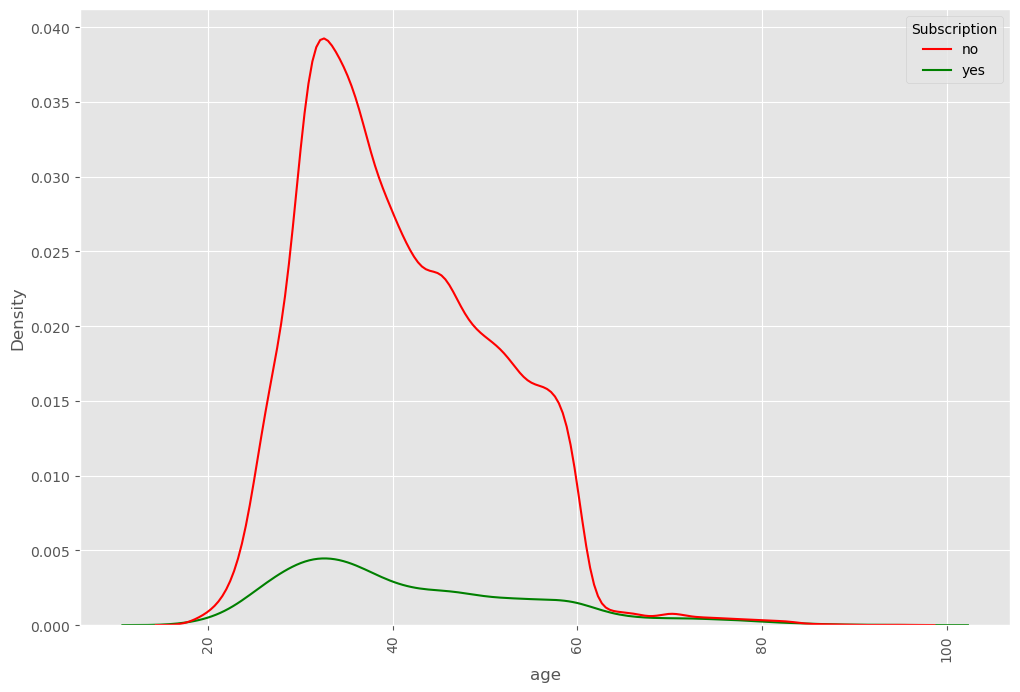

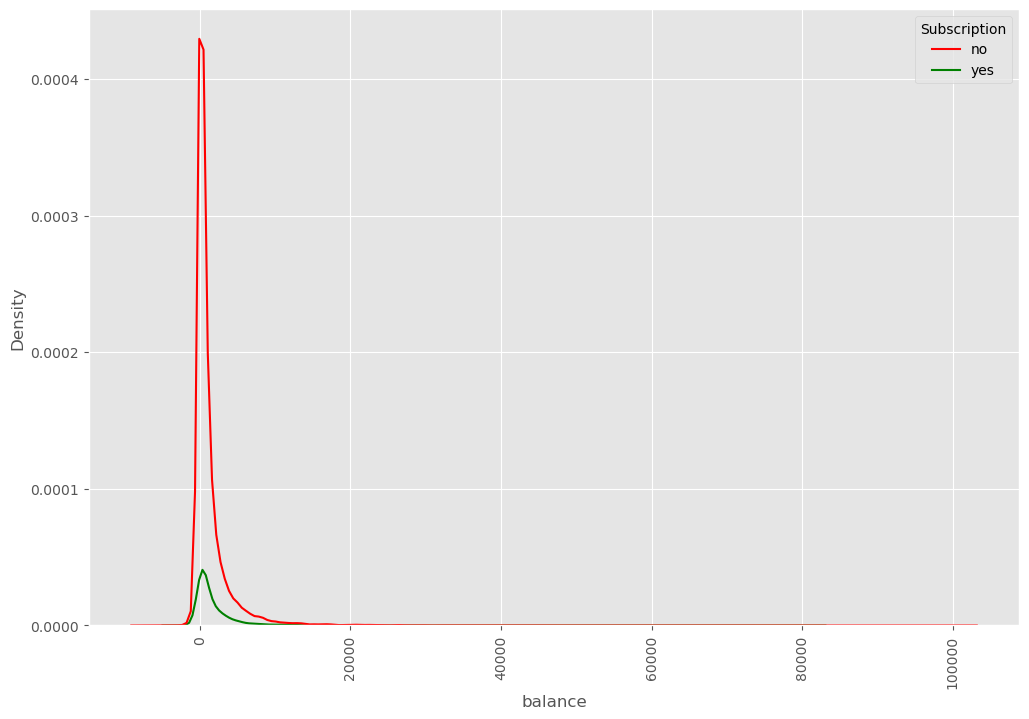

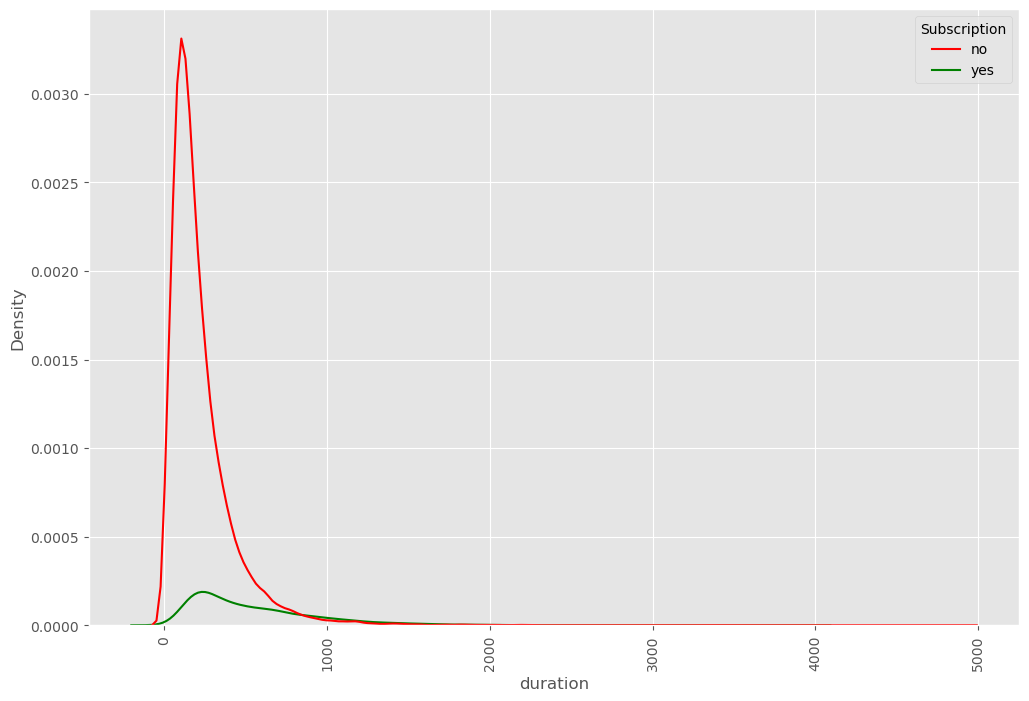

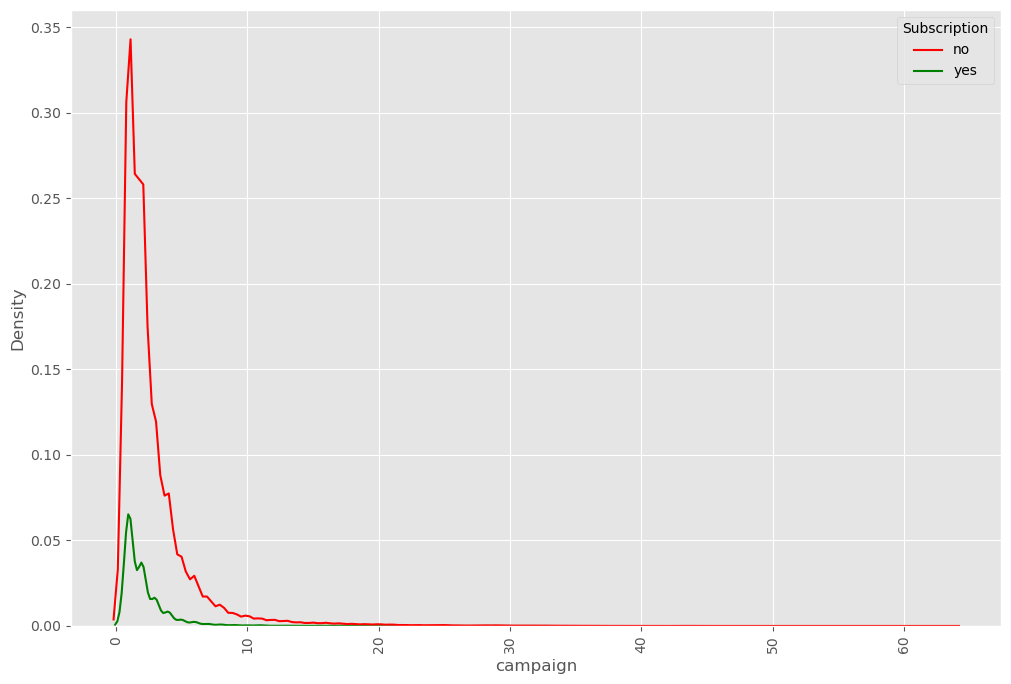

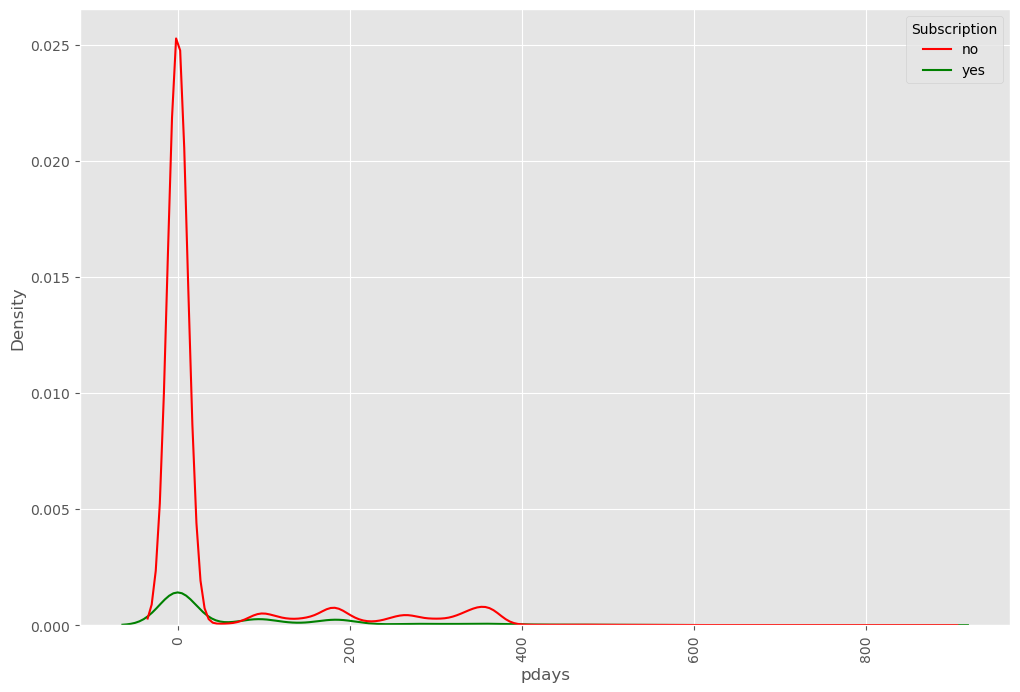

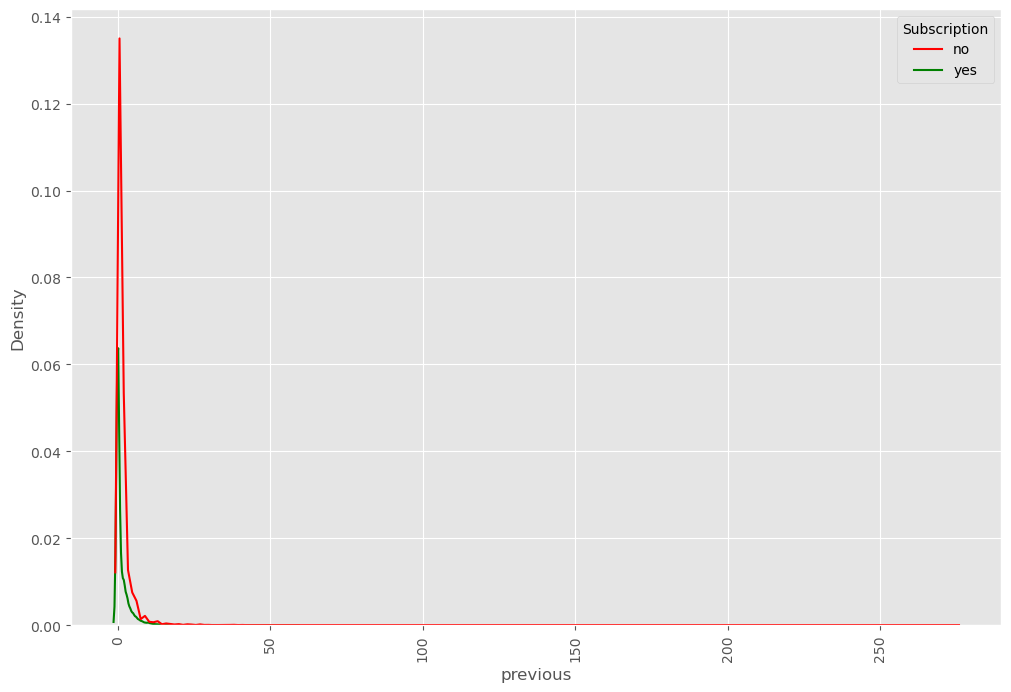

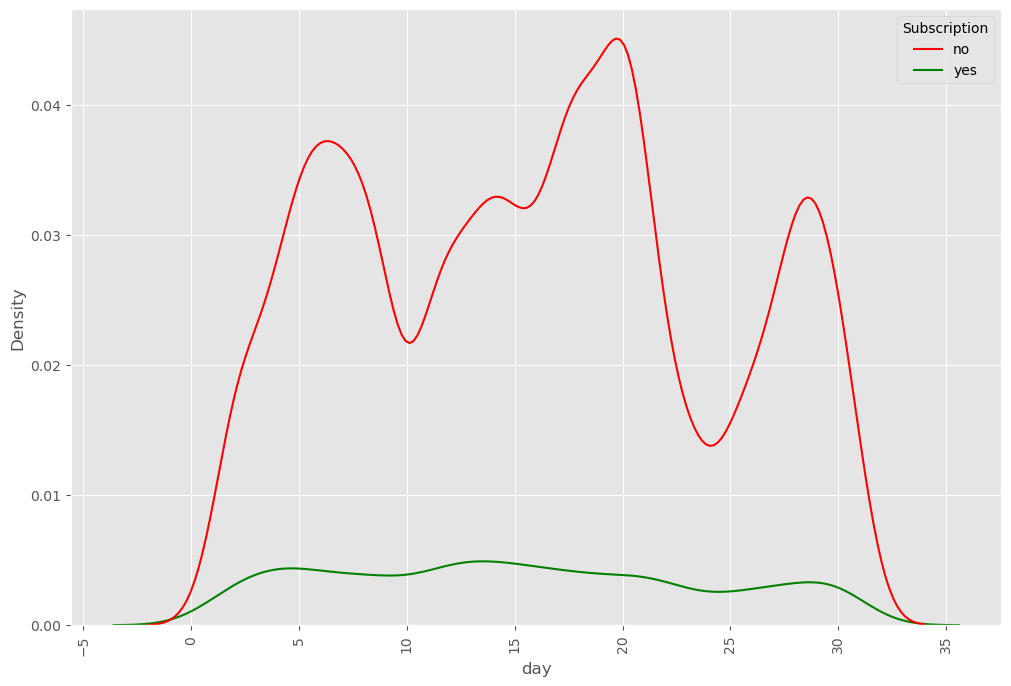

In [12]:
cols2 = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']
for col in cols2:
    plt.figure(figsize=(12, 8))
    ax = sns.kdeplot(data=bank_df, x=f'{col}', hue='Subscription', palette=('red', 'green'))
    plt.xticks(rotation=90)
    plt.show()

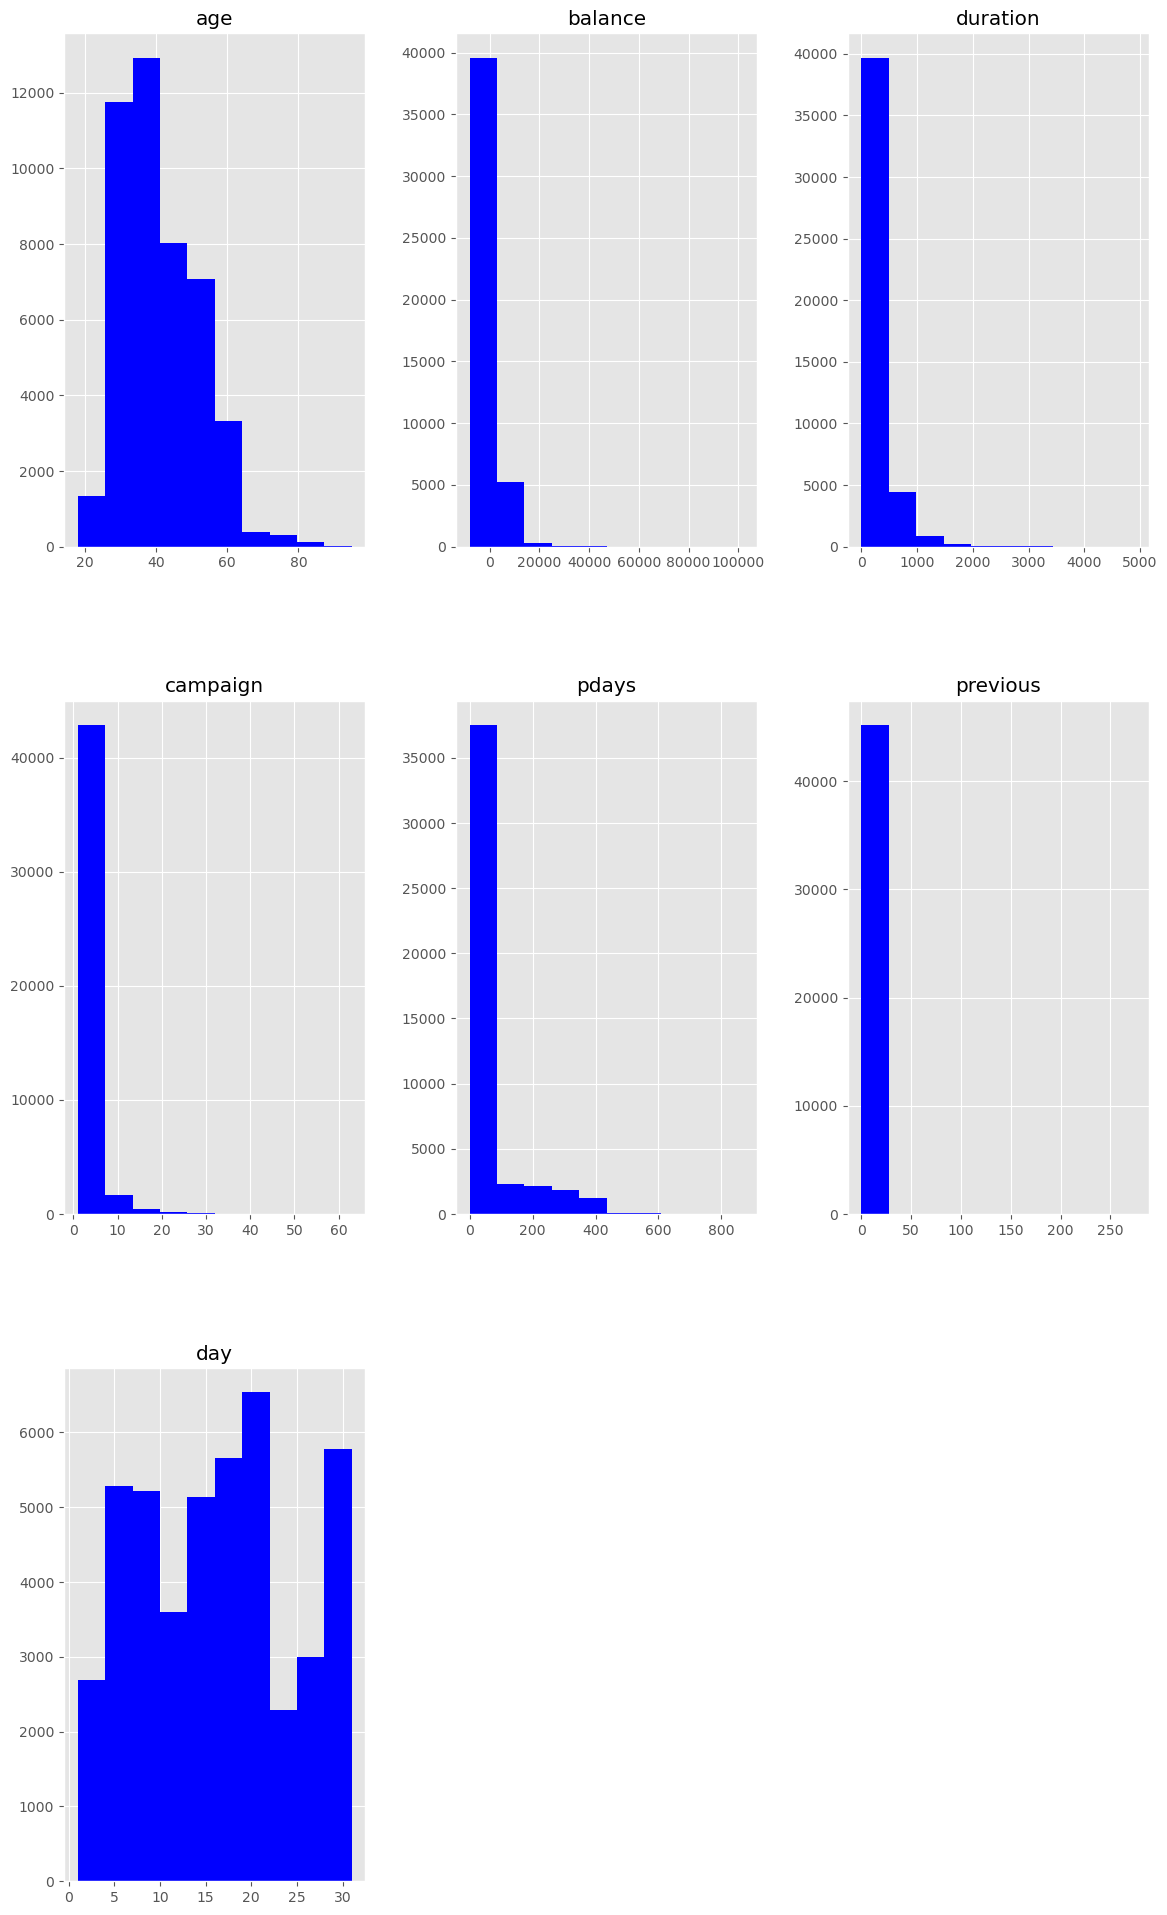

In [41]:
# Numerical dataset visulization
bank_df[cols2].hist(color='blue', figsize=(14, 24))
plt.show()

In [40]:
bank_df[cols2].skew()

age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
day          0.093079
dtype: float64

In [ ]:
Observations:
1. Given Bank dataset has consistent datatypes, no null values and duplicates.
2. There are more numbers in  every category not subscribing to term deposits.
3. Numerical datasets distributions are right skewed other than day column. 

In [14]:
# Features selection
predictors = bank_df.drop('Subscription', axis=1)
target = bank_df['Subscription']

# Encoding categorical data in object type to numberical type
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Predictors
predictors['job'] = label_encoder.fit_transform(predictors['job'])
predictors['marital'] = label_encoder.fit_transform(predictors['marital'])
predictors['education'] = label_encoder.fit_transform(predictors['education'])
predictors['default'] = label_encoder.fit_transform(predictors['default'])
predictors['housing'] = label_encoder.fit_transform(predictors['housing'])
predictors['loan'] = label_encoder.fit_transform(predictors['loan'])
predictors['contact'] = label_encoder.fit_transform(predictors['contact'])
predictors['month'] = label_encoder.fit_transform(predictors['month'])
predictors['poutcome'] = label_encoder.fit_transform(predictors['poutcome'])

# Target
target = label_encoder.fit_transform(target)

In [15]:
# Glance of dataset after encoding
predictors.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [43]:
# Splitting of dataset
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(predictors, target, train_size=0.80, random_state=100)
print('Train data shape for Predictors and Target: ')
train_x.shape, train_y.shape

Train data shape for Predictors and Target: 


((36168, 16), (36168,))

In [44]:
# Fitting of logistic regression ML model
from sklearn.linear_model import LogisticRegression

# Initialization of model
logit_model = LogisticRegression()

# Fitting of model
logit_model.fit(train_x, train_y)

# Predictions on test data
predictions = logit_model.predict(test_x)

C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
# Evaluation of model
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_y, predictions)

print('Confusion matrix: \n',cm)
print()
print('Accuracy: ', logit_model.score(test_x, test_y))
print()
print('Classification report: \n', classification_report(test_y, predictions))

Confusion matrix: 
 [[7820  184]
 [ 844  195]]

Accuracy:  0.8863209112020347

Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      8004
           1       0.51      0.19      0.28      1039

    accuracy                           0.89      9043
   macro avg       0.71      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [46]:
# Model visualisation using ROC curve
target_predict_prob = logit_model.predict_proba(train_x)[:,1]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(train_y, target_predict_prob)
auc = roc_auc_score(test_y, predictions)
auc

0.5823459781177747

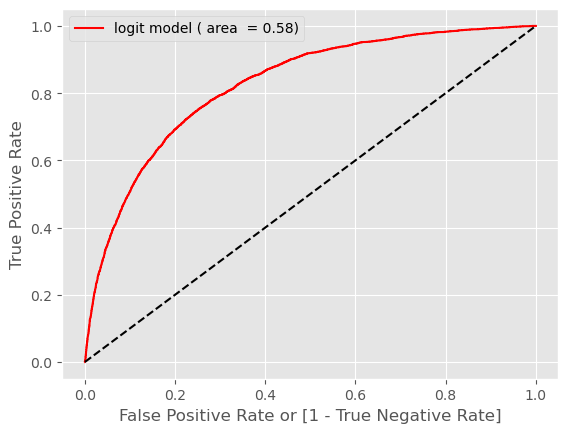

In [47]:
# Plotting
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [48]:
# Model fitting using statsmodels library
import statsmodels.api as sm

# Initialization and fitting model
stat_model = sm.Logit(train_y, train_x).fit()

# Evaluation of model
stat_model.summary()

Optimization terminated successfully.
         Current function value: 0.275420
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                          Logit   Df Residuals:                    36152
Method:                           MLE   Df Model:                           15
Date:                Sat, 18 Nov 2023   Pseudo R-squ.:                  0.2390
Time:                        15:12:20   Log-Likelihood:                -9961.4
converged:                       True   LL-Null:                       -13090.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0230      0.001    -16.055      0.000      -0.026      -0.020
job           -0.0141      0.006     -2.446      0.014      -0.025      -0.003
marital       -0.1708      0.029     -5.841      0.000      -0.228      -0.113
education      0.0300      0.025      1.204      0.228      -0.019       0.079
default       -0.4905      0.184     -2.667      0.008      -0.851      -0.130
balance     2.155e-05   4.83e-06      4.458      0.000    1.21e-05     3.1e-05
housing       -1.2872      0.041    -31.397      0.000      -1.368      -1.207
loan          -0.8791      0.064    -13.756      0.000      -1.004      -0.754
contact       -0.6081      0.030    -20.331      0.000      -0.667      -0.549
day           -0.0182      0.002     -8.187      0.000      -0.023      -0.014
month          0.0038      0.006      0.644      0.520      -0.008       0.015
duration       0.0038   6.75e-05     56.640      0.000       0.004       0.004
campaign      -0.1626      0.012    -13.925      0.000      -0.186      -0.140
pdays          0.0002      0.000      0.700      0.484      -0.000       0.001
previous       0.0507      0.009      5.651      0.000       0.033       0.068
poutcome      -0.2340      0.025     -9.464      0.000      -0.283      -0.186
==============================================================================
"""

In [49]:
# Hyperparameters tuninng
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

# defining grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = RandomizedSearchCV(logit_model, param_distributions=grid, n_iter=8,cv=3)

grid_result = grid_search.fit(train_x, train_y)

C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [51]:
# summarize results
print("Best accuracy: %f using %s" % (grid_result.score(test_x, test_y), grid_result.best_params_))

Best accuracy: 0.888975 using {'solver': 'newton-cg', 'penalty': 'none', 'C': 0.01}
